In [7]:
from fbm import utils
from fbm.sim import naive

import numpy as np
import matplotlib.pyplot as plt

In [3]:
utils.bfBm_max_rho(0.1, 0.5)

0.7368732175576562

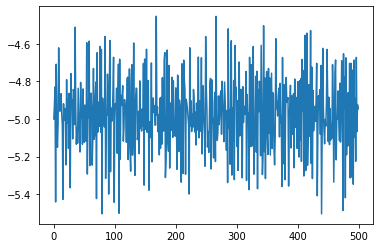

In [15]:
H = 0.1
v = 0.3
X0 = m = -5
alpha = 5e-4
T = 10
spacing = 50

fBm = naive.NaiveFBmGenerator()
fBm_path = fBm.generate_fGn(H, T*spacing) / spacing**H
X = np.ndarray(T*spacing)
X[0] = X0
for i in range(1, len(X)):
    dw = fBm_path[i] - fBm_path[i-1]
    X[i] = X[i-1] + v*dw - alpha * (X[i-1] - m) / spacing

plt.plot(X)
plt.show()